In [13]:
import matplotlib.pyplot as plt

In [14]:
file_name = "random_output_double_hash_drbg.txt"
with open(file_name, "r") as f:
    contents = f.read()
double_drbg = [int(contents[i:i+2], base=16) for i in range(0, len(contents)//2, 2)]


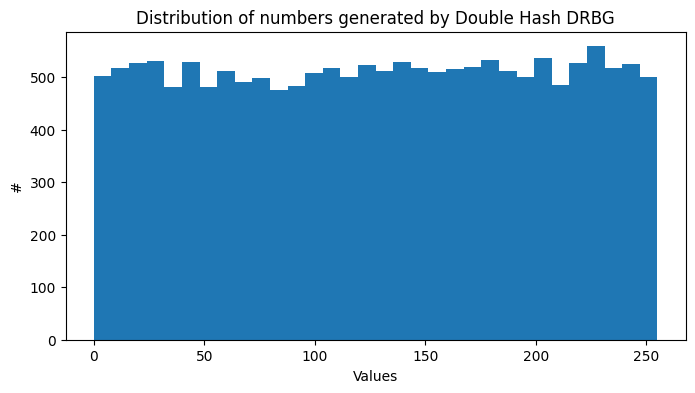

In [19]:
plt.figure(figsize=(8,4))
plt.title("Distribution of numbers generated by Double Hash DRBG")
plt.ylabel("#")
plt.xlabel("Values")
plt.hist(double_drbg, bins=32)
plt.show()

In [21]:
file_name = "random_output_hash_drbg.txt"
with open(file_name, "r") as f:
    contents = f.read()
hash_drbg = [int(contents[i:i+2], base=16) for i in range(0, len(contents)//2, 2)]

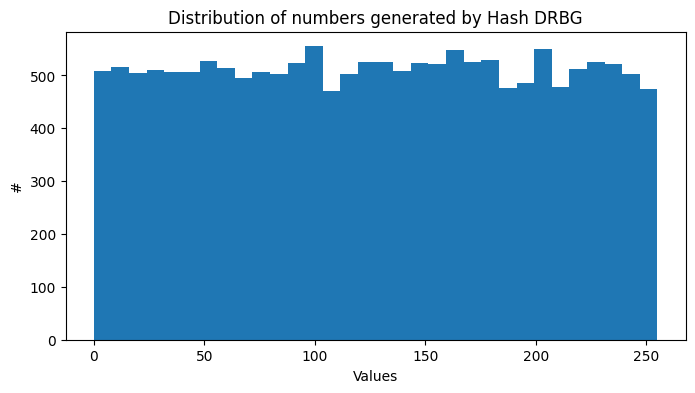

In [22]:
plt.figure(figsize=(8,4))
plt.title("Distribution of numbers generated by Hash DRBG")
plt.ylabel("#")
plt.xlabel("Values")
plt.hist(hash_drbg, bins=32)
plt.show()

In [35]:
import numpy as np
from scipy.stats import kstest
from scipy.stats import chisquare

def test_for_uniformity(data):
    num_bins = 256  # Adjust bin size as needed
    observed_freq, _ = np.histogram(data, bins=num_bins)
    
    # Expected frequency if uniform
    expected_freq = np.ones(num_bins) * len(data) / num_bins
    
    # Perform Chi-Square test
    chi_stat, p_value = chisquare(observed_freq, expected_freq)
    
    print(f"Chi-Square Statistic: {chi_stat}, P-value: {p_value}")
    
    if p_value > 0.05:
        print("Fail to reject the null hypothesis: Data may be uniform.")
    else:
        print("Reject the null hypothesis: Data is likely not uniform.")


In [36]:
test_for_uniformity(double_drbg)

Chi-Square Statistic: 241.6875, P-value: 0.7158013125450466
Fail to reject the null hypothesis: Data may be uniform.


In [37]:
test_for_uniformity(hash_drbg)

Chi-Square Statistic: 263.65625, P-value: 0.341455023406043
Fail to reject the null hypothesis: Data may be uniform.
